<a href="https://colab.research.google.com/github/HumayDS/Big-data-analysis/blob/main/11_lesson_Clustering_update%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

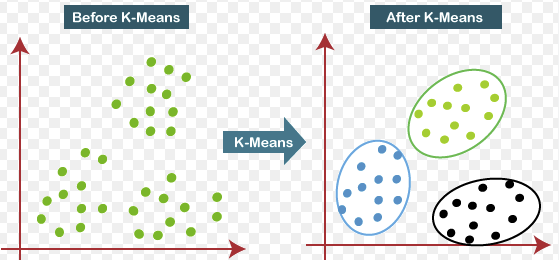

### K- Means clustering

## Müştəriləri seqmentasiyalara avtomatik ayırmaq

### Addımlar :
## Addım 1 : Cluster sayı müəyyənləşdirilir, məsələn 2 clusterə ayıracam
## Addım 2 : K mərkəzləri random olaraq(və ya müdaxilə olunaraq seçilir)  seçilir
## Addım 3 : Hər observation üçün k mərkəzə uzaqlıqları hesablanır, və observationlar ən yaxın k -  mərkəzinə yazılır
## Addım 4 : Bu proses dəfələrlə təkrarlanır, sonda ən az xətası olan seçilir.
# QEYD : k-nı neçə seçməliyik? Bunu özümüz müəyyən etmək istəmiriksə, müəyyən metodlardan istifadə edərək optimum k-nı tapacayıq


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

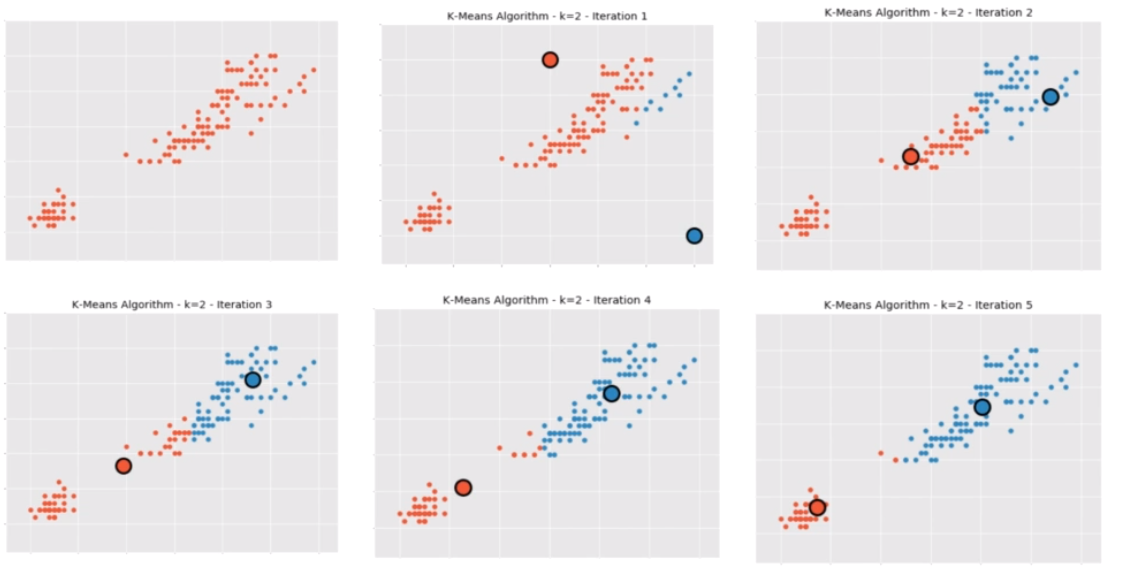

In [2]:
df =   pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/USArrests.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
## 1-ci sutunu, yeni shtatlar olan sutunu index olaraq secirem
df.index =  df.iloc[:,0]

In [5]:
##Indexlere baxiram
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [6]:
##Dataya baxiram
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [7]:
#1-ci sutunu silirem
df = df.drop('Unnamed: 0' , axis = 1)

In [8]:
#Dataya tekrar baxiram
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
#Indexlerin sutun basliqini silirem
df.index.name = None

In [10]:
## Dataset hazirdir
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
#Na-lari yoxlayiram
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
#Umumi typle lara nezer yetirirem
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [13]:
#Data haqda melumat aliram, describe edirem
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [ ]:
#Ehtiyac olarsa, her hansi deyiskene agirliq getirmek ucun yeni deyisken yarada bilerem
##df['murder_11'] = np.where(df['Murder'] > 11 , 1 , 0)

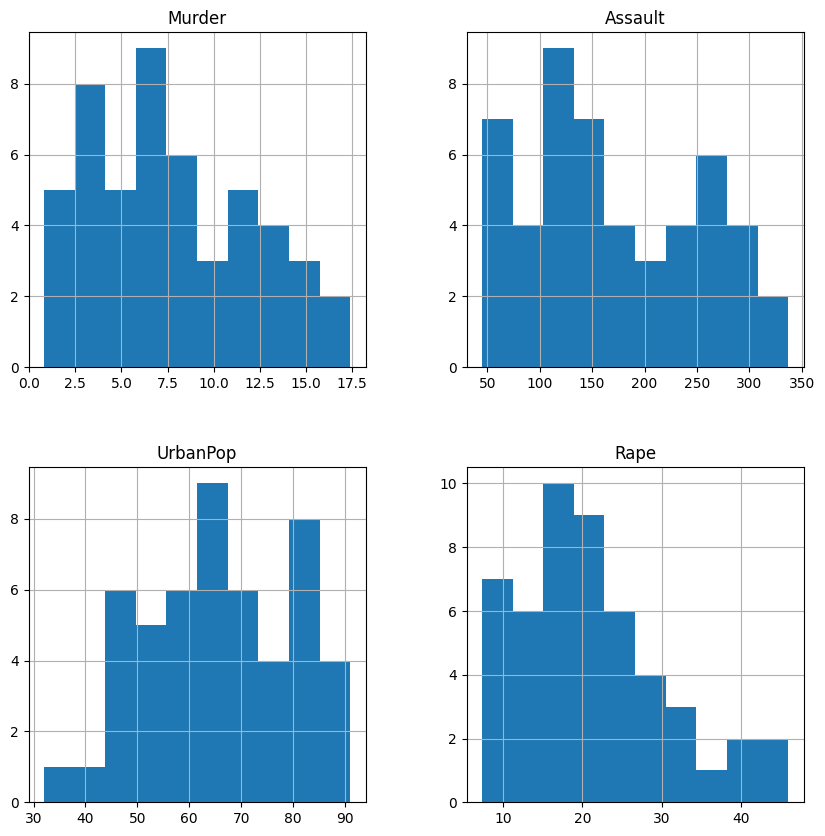

In [14]:
#Deyiskenlerin dagilimina baxiram
df.hist(figsize = (10,10));

In [29]:
# 4 klusterden ibaret model qururam
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4 , random_state=3425)
kmeans

KMeans(n_clusters=4, random_state=3425)

In [30]:
#Qurulan alqoritmani datasetimize fit edirik
k_fit = kmeans.fit(df)

In [31]:
#Modelden kluster sayini cixaririq(yoxlayiriq , 4 demisikse , 4 olacaq)
k_fit.n_clusters

4

In [32]:
## KLusterin merkezlerine baxaq
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [33]:
##Hazir klasterlere baxaq
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [ ]:
## 2 kluster yaradaq ve vizuallasdiraq
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

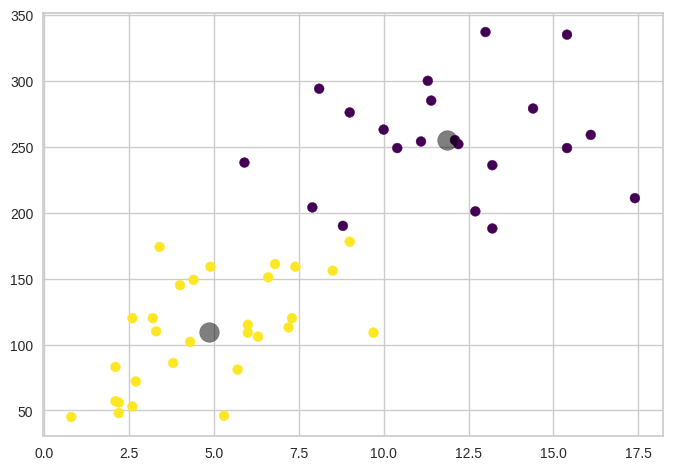

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [ ]:
#!pip install --upgrade matplotlib
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

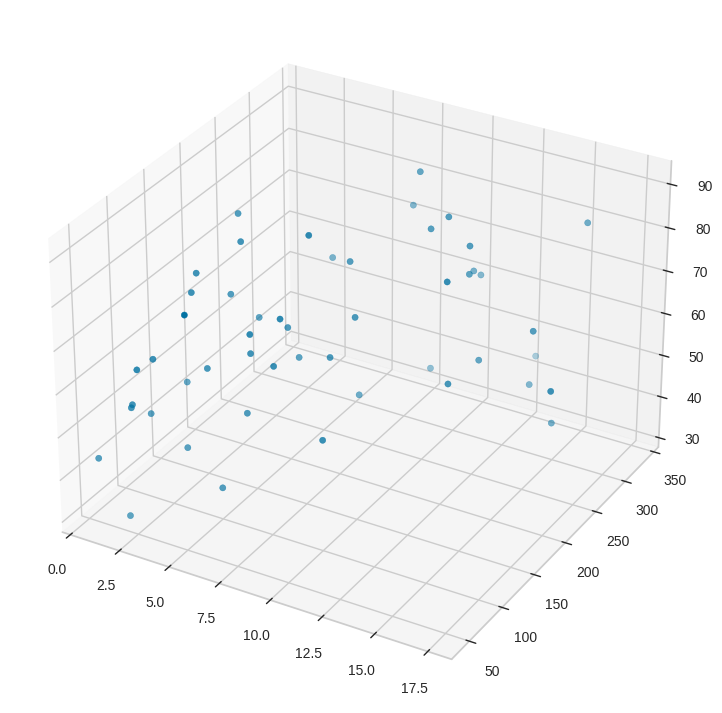

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

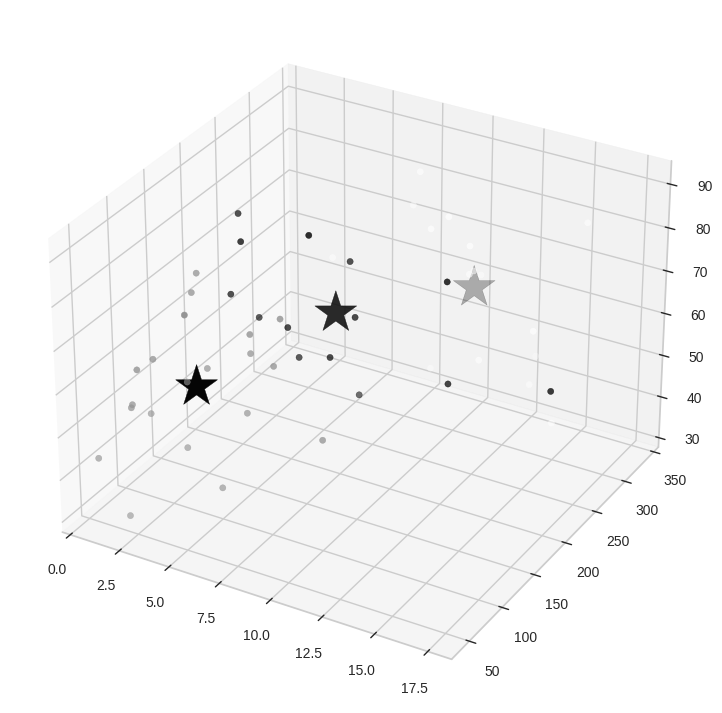

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2],
           marker='*',
           c='#050505',
           s=1000);

In [ ]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [ ]:
clusters2 = pd.DataFrame({"Shtatlar" : df.index, "Clusters": clusters})[0:10]
clusters2

,Shtatlar,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,1
4,California,1
5,Colorado,1
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,1


In [ ]:
df["Klusterler"] = clusters

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape,Klusterler
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,1


In [ ]:
df["Klusterler"] = df['Klusterler'] + 1

In [ ]:
df.head(20)

,Murder,Assault,UrbanPop,Rape,Klusterler
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,2


In [ ]:
Kluster1 = df[df.Klusterler ==1 ]

In [ ]:
Kluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,29.0,4.841379,2.349091,0.8,2.7,4.4,6.6,9.7
Assault,29.0,109.758621,41.321609,45.0,81.0,110.0,149.0,178.0
UrbanPop,29.0,64.034483,14.391175,32.0,54.0,66.0,73.0,89.0
Rape,29.0,16.248276,5.974686,7.3,11.2,16.3,20.2,29.3
Klusterler,29.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [ ]:
Kluster2 = df[df.Klusterler ==2 ]
Kluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,21.0,11.857143,2.962528,5.9,10.0,12.1,13.2,17.4
Assault,21.0,255.000000,42.169894,188.0,236.0,254.0,279.0,337.0
UrbanPop,21.0,67.619048,14.681540,44.0,58.0,70.0,80.0,91.0
Rape,21.0,28.114286,8.900128,15.8,22.2,26.1,32.1,46.0
Klusterler,21.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


###Optimum Klustr sayini mueyyenlesdir

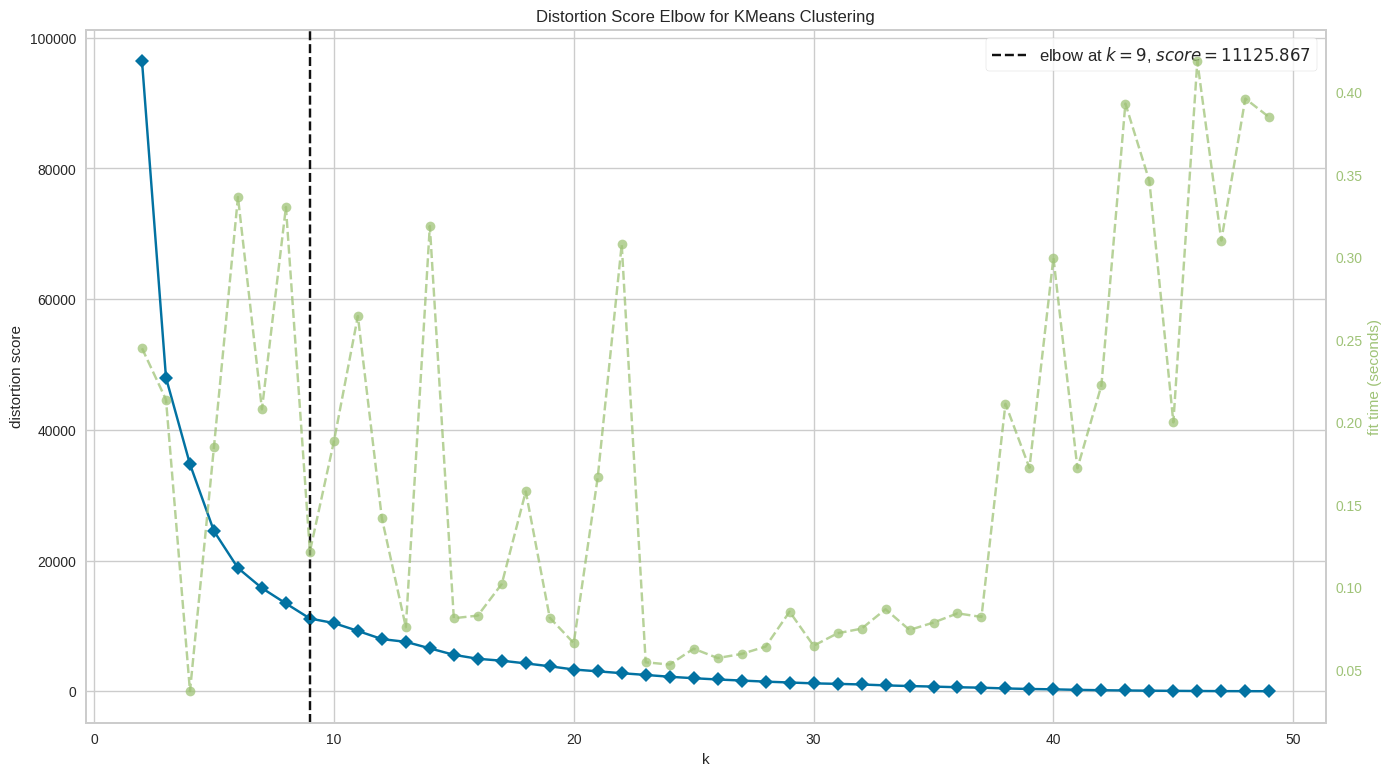

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df)
visualizer.poof()

In [ ]:
df2  = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/Wholesale_customers_data.csv')

In [ ]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


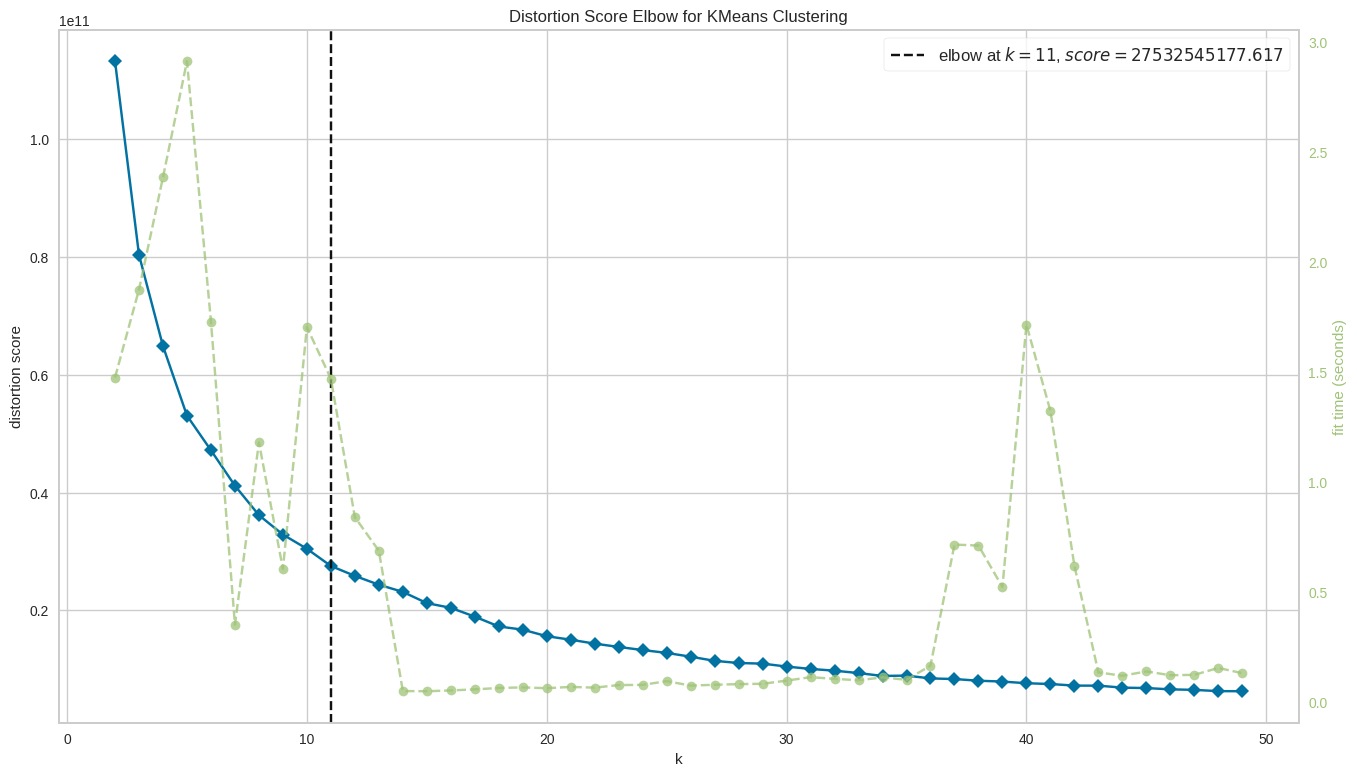

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df2)
visualizer.poof()

In [ ]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df2)
klusterler = k_fit.labels_
klusterler

array([3, 0, 3, 3, 1, 3, 3, 3, 3, 0, 0, 3, 1, 0, 1, 3, 0, 3, 3, 3, 3, 3,
       1, 2, 1, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       3, 0, 0, 2, 3, 0, 3, 3, 1, 0, 1, 3, 0, 0, 3, 3, 3, 2, 3, 0, 3, 2,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 1, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 2, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
df2["Klusterler"] = klusterler +1

In [ ]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Klusterler
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,2
